<a href="https://colab.research.google.com/github/harshiniv26/Sentiment-Analysis-on-Amazon-Reviews/blob/main/sentiment_anaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment Analysis on Amazon Product Reviews using Machine Learning**

**Importing Libraries**


In [ ]:
!pip install nltk

# Import necessary libraries
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Download NLTK data**

In [ ]:
# Download stopwords for text preprocessing
nltk.download('stopwords')

# Load the stopwords set
stop_words = set(nltk.corpus.stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Loading dataset (Assume CSV format with 'review' and 'sentiment' columns)**

In [ ]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()


Saving colab-amazon.csv to colab-amazon.csv


In [ ]:
# Load the uploaded CSV file into a DataFrame
df = pd.read_csv("colab-amazon.csv")

# View the first 5 rows of the dataset
df.head()


,sno,reviewer_name,rating,review
0,0,NaN,4,No issues.
1,1,0mie,5,"Purchased this for my device, it worked as adv..."
2,2,1K3,4,it works as expected. I should have sprung for...
3,3,1m2,5,This think has worked out great.Had a diff. br...
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit..."


**Drop the reviewer name**

In [ ]:
# Drop 'reviewer_name' column as it is not needed for sentiment analysis
df = df.drop(columns=['reviewer_name'], errors='ignore')

# Convert ratings to sentiment labels
def map_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df['rating'].apply(map_sentiment)

# Display the updated DataFrame with 'review', 'rating', and 'sentiment'
df[['review', 'rating', 'sentiment']].head()


,review,rating,sentiment
0,No issues.,4,positive
1,"Purchased this for my device, it worked as adv...",5,positive
2,it works as expected. I should have sprung for...,4,positive
3,This think has worked out great.Had a diff. br...,5,positive
4,"Bought it with Retail Packaging, arrived legit...",5,positive


**Preprocessing**

In [ ]:
# Function to clean and preprocess the review text
def clean_text(text):
    text = str(text).lower()                      # Convert text to lowercase
    text = re.sub(r'[^a-z\s]', '', text)          # Remove non-alphabetic characters
    words = text.split()                          # Tokenize the text
    words = [w for w in words if w not in stop_words]  # Remove stopwords
    return ' '.join(words)                       # Rejoin the words into a single string

# Apply the cleaning function to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_text)

# Display the cleaned reviews
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,No issues.,issues
1,"Purchased this for my device, it worked as adv...",purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,works expected sprung higher capacity think ma...
3,This think has worked out great.Had a diff. br...,think worked greathad diff bran gb card went s...
4,"Bought it with Retail Packaging, arrived legit...",bought retail packaging arrived legit orange e...


**TF-IDF for feature extraction**

In [ ]:
# Convert cleaned reviews into TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])

# Set the target variable as 'sentiment'
y = df['sentiment']

# Display the shape of the resulting matrix (X) and target vector (y)
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (4915, 9680)


**Spliting the Dataset in to Training and Testing sets**

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3932, 9680)
Testing data shape: (983, 9680)


**Training with Naive Bayes model**

In [ ]:
# Train the Multinomial Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Check the model training
print("Model trained successfully!")


Model trained successfully!


**Predicting and evaluating**
to get accuracy


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9033570701932858

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        70
     neutral       0.00      0.00      0.00        25
    positive       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.30      0.33      0.32       983
weighted avg       0.82      0.90      0.86       983



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Constructing Confusion Matrix Heatmap**

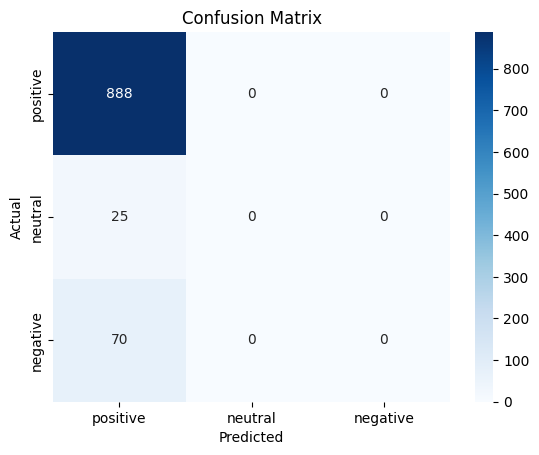

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "neutral", "negative"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Using LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Accuracy: 0.9267548321464903

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.36      0.51        70
     neutral       0.00      0.00      0.00        25
    positive       0.93      1.00      0.96       888

    accuracy                           0.93       983
   macro avg       0.61      0.45      0.49       983
weighted avg       0.90      0.93      0.90       983



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Constructing Confusion Matrix Heatmap**

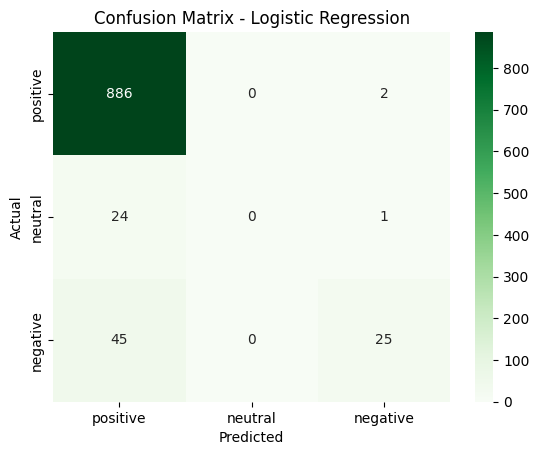

In [ ]:
# Plot confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=["positive", "neutral", "negative"])
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()



**Using RandomOverSampler**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize oversampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling on the TF-IDF feature matrix and sentiment labels
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check class distribution after resampling
from collections import Counter
print("Class distribution after resampling:", Counter(y_resampled))


Class distribution after resampling: Counter({'positive': 4449, 'neutral': 4449, 'negative': 4449})


In [ ]:
# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Logistic Regression on balanced data
lr_balanced = LogisticRegression(max_iter=1000)
lr_balanced.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_balanced = lr_balanced.predict(X_test_resampled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test_resampled, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_balanced))


Accuracy: 0.9827715355805243

Classification Report:
               precision    recall  f1-score   support

    negative       0.97      1.00      0.99       908
     neutral       0.98      1.00      0.99       857
    positive       1.00      0.95      0.97       905

    accuracy                           0.98      2670
   macro avg       0.98      0.98      0.98      2670
weighted avg       0.98      0.98      0.98      2670



**Constructing Confusion matrix for balanced logistic regression**

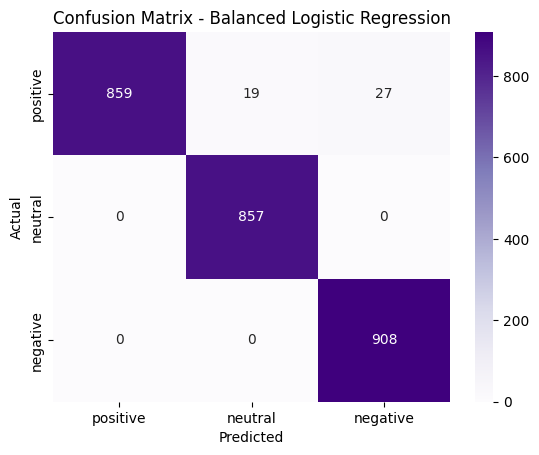

In [ ]:
# Confusion matrix for balanced logistic regression
cm_balanced = confusion_matrix(y_test_resampled, y_pred_balanced, labels=["positive", "neutral", "negative"])
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Purples',
            xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Balanced Logistic Regression')
plt.show()


**Using  LinearSVC**

In [ ]:
from sklearn.svm import LinearSVC

# Train LinearSVC on balanced data
svc_model = LinearSVC()
svc_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_svc = svc_model.predict(X_test_resampled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test_resampled, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_svc))


Accuracy: 0.9883895131086142

Classification Report:
               precision    recall  f1-score   support

    negative       0.98      1.00      0.99       908
     neutral       0.98      1.00      0.99       857
    positive       1.00      0.97      0.98       905

    accuracy                           0.99      2670
   macro avg       0.99      0.99      0.99      2670
weighted avg       0.99      0.99      0.99      2670



**constructing Confusion matrix for LinearSVC**

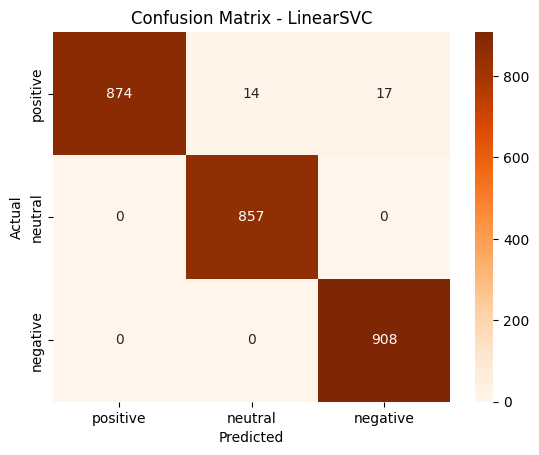

In [ ]:
# Confusion matrix for LinearSVC
cm_svc = confusion_matrix(y_test_resampled, y_pred_svc, labels=["positive", "neutral", "negative"])
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LinearSVC')
plt.show()


**constructing RandomForestClassifier**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier on balanced data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test_resampled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test_resampled, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_rf))


Accuracy: 0.9973782771535581

Classification Report:
               precision    recall  f1-score   support

    negative       0.99      1.00      1.00       908
     neutral       1.00      1.00      1.00       857
    positive       1.00      0.99      1.00       905

    accuracy                           1.00      2670
   macro avg       1.00      1.00      1.00      2670
weighted avg       1.00      1.00      1.00      2670



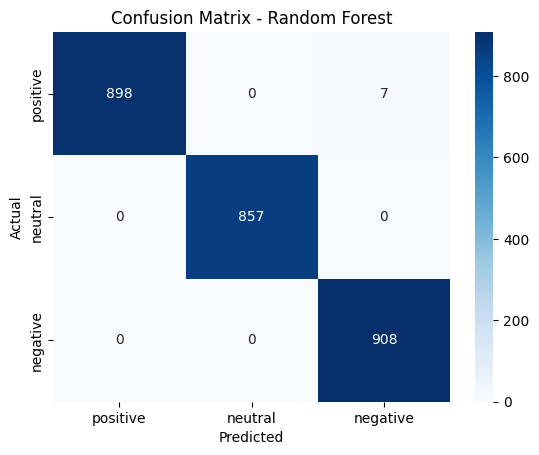

**Calculating  precision, recall, and F1-score for all the models used until now**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Update precision, recall, and F1-score calculations with zero_division=0
results = {
    'Model': ['Naïve Bayes', 'Logistic Regression', 'LinearSVC', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),  # Naïve Bayes prediction
        accuracy_score(y_test, y_pred_lr),  # Logistic Regression prediction
        accuracy_score(y_test_resampled, y_pred_svc),  # LinearSVC prediction
        accuracy_score(y_test_resampled, y_pred_rf)  # Random Forest prediction
    ],
    'Precision': [
        precision_score(y_test, y_pred, average='weighted', zero_division=0),  # Naïve Bayes precision
        precision_score(y_test, y_pred_lr, average='weighted', zero_division=0),  # Logistic Regression precision
        precision_score(y_test_resampled, y_pred_svc, average='weighted', zero_division=0),  # LinearSVC precision
        precision_score(y_test_resampled, y_pred_rf, average='weighted', zero_division=0)  # Random Forest precision
    ],
    'Recall': [
        recall_score(y_test, y_pred, average='weighted', zero_division=0),  # Naïve Bayes recall
        recall_score(y_test, y_pred_lr, average='weighted', zero_division=0),  # Logistic Regression recall
        recall_score(y_test_resampled, y_pred_svc, average='weighted', zero_division=0),  # LinearSVC recall
        recall_score(y_test_resampled, y_pred_rf, average='weighted', zero_division=0)  # Random Forest recall
    ],
    'F1-Score': [
        f1_score(y_test, y_pred, average='weighted', zero_division=0),  # Naïve Bayes F1-Score
        f1_score(y_test, y_pred_lr, average='weighted', zero_division=0),  # Logistic Regression F1-Score
        f1_score(y_test_resampled, y_pred_svc, average='weighted', zero_division=0),  # LinearSVC F1-Score
        f1_score(y_test_resampled, y_pred_rf, average='weighted', zero_division=0)  # Random Forest F1-Score
    ],
    'Classification Report': [
        classification_report(y_test, y_pred, output_dict=True),  # Naïve Bayes classification report
        classification_report(y_test, y_pred_lr, output_dict=True),  # Logistic Regression classification report
        classification_report(y_test_resampled, y_pred_svc, output_dict=True),  # LinearSVC classification report
        classification_report(y_test_resampled, y_pred_rf, output_dict=True)  # Random Forest classification report
    ]
}

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame(results)

# Display the comparison table
print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1-Score  \
0          Naïve Bayes  0.903357   0.816054  0.903357  0.857489   
1  Logistic Regression  0.926755   0.901669  0.926755  0.904888   
2            LinearSVC  0.988390   0.988591  0.988390  0.988339   
3        Random Forest  0.997378   0.997398  0.997378  0.997378   

                               Classification Report  
0  {'negative': {'precision': 0.0, 'recall': 0.0,...  
1  {'negative': {'precision': 0.8928571428571429,...  
2  {'negative': {'precision': 0.9816216216216216,...  
3  {'negative': {'precision': 0.9923497267759562,...  


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**Demonstating the results of the calculation accuracy ,precision, recall, F1-score**

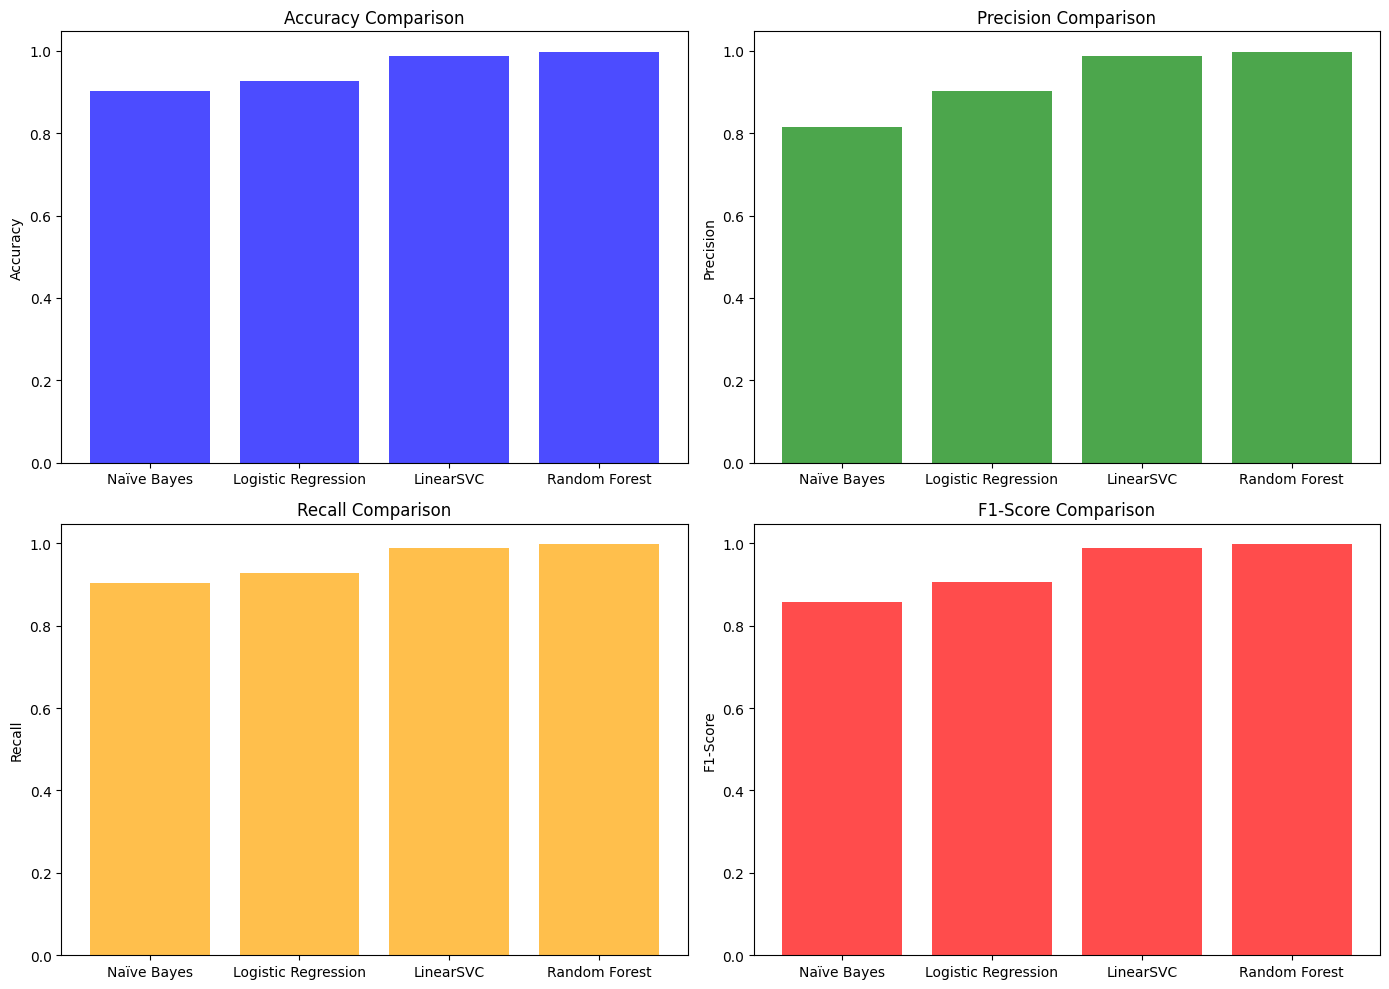

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from previous results
models = ['Naïve Bayes', 'Logistic Regression', 'LinearSVC', 'Random Forest']
accuracy = [0.903357, 0.926755, 0.988390, 0.997378]
precision = [0.816054, 0.901669, 0.988591, 0.997398]
recall = [0.903357, 0.926755, 0.988390, 0.997378]
f1_score = [0.857489, 0.904888, 0.988339, 0.997378]

# Setting up the x-axis positions for the models
x = np.arange(len(models))

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Plot
ax[0, 0].bar(x, accuracy, color='blue', alpha=0.7)
ax[0, 0].set_title('Accuracy Comparison')
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(models)

# Precision Plot
ax[0, 1].bar(x, precision, color='green', alpha=0.7)
ax[0, 1].set_title('Precision Comparison')
ax[0, 1].set_ylabel('Precision')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(models)

# Recall Plot
ax[1, 0].bar(x, recall, color='orange', alpha=0.7)
ax[1, 0].set_title('Recall Comparison')
ax[1, 0].set_ylabel('Recall')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(models)

# F1-Score Plot
ax[1, 1].bar(x, f1_score, color='red', alpha=0.7)
ax[1, 1].set_title('F1-Score Comparison')
ax[1, 1].set_ylabel('F1-Score')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(models)

# Adjust layout
plt.tight_layout()
plt.show()


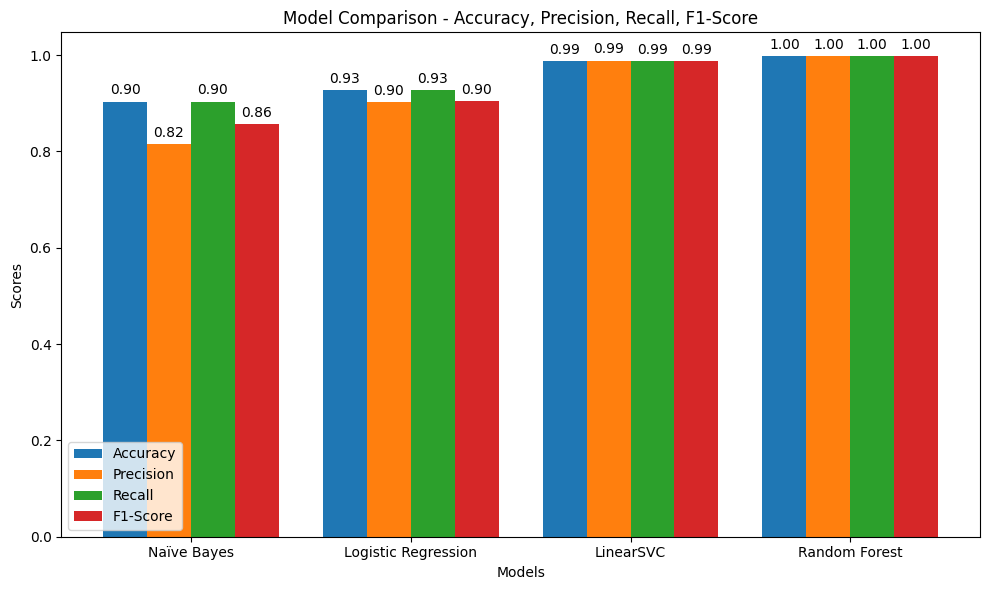

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Naïve Bayes', 'Logistic Regression', 'LinearSVC', 'Random Forest']

# Metrics for each model
accuracy = [0.903357, 0.926755, 0.988390, 0.997378]
precision = [0.816054, 0.901669, 0.988591, 0.997398]
recall = [0.903357, 0.926755, 0.988390, 0.997378]
f1_score = [0.857489, 0.904888, 0.988339, 0.997378]

# Set the positions of the bars on the x-axis
x = np.arange(len(models))

# Width of the bars
width = 0.2

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width*0.5, precision, width, label='Precision')
rects3 = ax.bar(x + width*0.5, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1-Score')

# Labeling the plot
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison - Accuracy, Precision, Recall, F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels to the bars
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

# Show the plot
plt.tight_layout()
plt.show()


**CONCLUSION**
In this project, we developed a machine learning model to perform sentiment analysis on Amazon product reviews. By using a Random Forest Classifier and applying TF-IDF vectorization, we successfully transformed textual reviews into numerical features suitable for training.